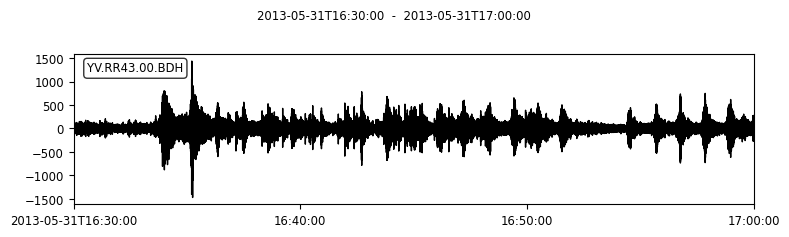

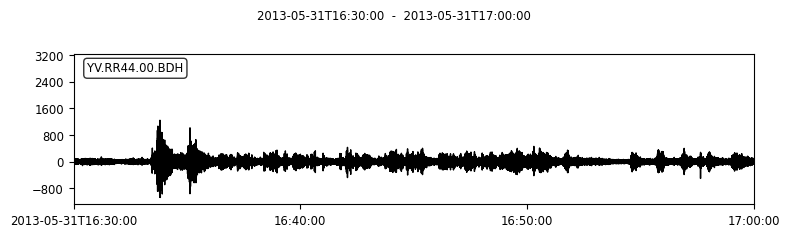

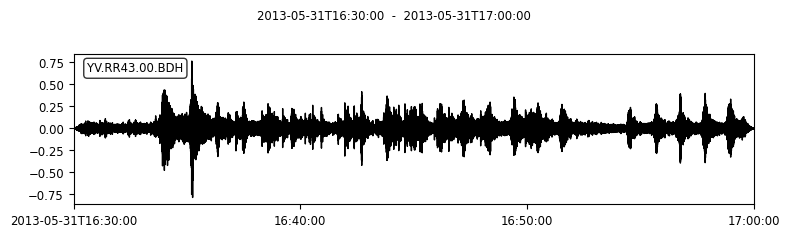

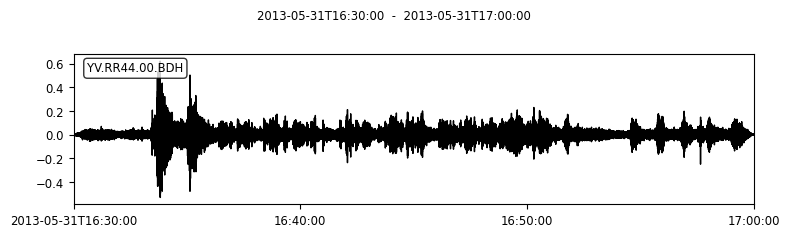

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("RESIF")
t = UTCDateTime(
    "2013-05-31T16:30:00"
)  # on rentre la date et l'heure du debut de l'enregistrement
chnl = "BDH"  # BDH pour l'hydrophone, BHZ pour le deplacement vertical, BH1 et BH2 pour les 2 deplacements horizontaux

signal43_brut = client.get_waveforms(
    "YV", "RR43", "00", chnl, t, t + 1 * 30 * 60
).filter(
    "bandpass", freqmin=8.0, freqmax=46.0, corners=2, zerophase=True
)  # on charge 1/2 heure de donnees (= 1*30*60 sec.) + filtre passe-bande entre 8 et 46 Hz
signal44_brut = client.get_waveforms(
    "YV", "RR44", "00", chnl, t, t + 1 * 30 * 60
).filter("bandpass", freqmin=8.0, freqmax=46.0, corners=2, zerophase=True)

inv43 = client.get_stations(
    network="YV", station="RR43", channel=chnl, level="response", format="xml"
)  # on charge les metadonnees sur la reponse du capteur

inv44 = client.get_stations(
    network="YV", station="RR44", channel=chnl, level="response", format="xml"
)

signal43_brut.plot()  # on trace les signaux brutes
signal44_brut.plot()

signal43tr = signal43_brut[0].copy()
signal43tr = signal43tr.remove_response(
    inventory=inv43
)  # on corrige de la reponse du capteur
signal43tr.plot()  # on trace les signaux corriges
signal43 = signal43tr[:]

signal44tr = signal44_brut[0].copy()
signal44tr = signal44tr.remove_response(inventory=inv44)
signal44tr.plot()
signal44 = signal44tr[:]